# 이미지 증강(Image Augentatiton)
---
- tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
# !pip install tensorflow==2.11.0

In [4]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [5]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-01-09 07:34:56--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  19.0MB/s    in 13s     

2023-01-09 07:35:10 (16.9 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [6]:
!tar -xvzf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [7]:
import pathlib

data_dir = pathlib.Path('/content/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
fnames = list(data_dir.glob('roses/*.jpg'))
fnames[0]

PosixPath('/content/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')

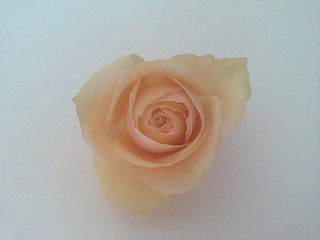

In [10]:
import PIL
import PIL.Image

PIL.Image.open(fnames[0])

### Dataset 객체

In [11]:
image_size = (180,180)
batch_size = 32

In [12]:
train_ds  = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    validation_split = 0.2,
    subset='training',
    image_size=image_size,
    seed=2022
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [13]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [14]:
val_ds  = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    validation_split = 0.2,
    subset='validation',
    image_size=image_size,
    seed=2022
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
def build_model():
    model = keras.Sequential([
        # padding 
        # default값은 valid
        # same은 이미지 크기가 변하지 않게 패딩을 준다.
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape = (180,180,3)),
        layers.MaxPool2D(2),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),

        layers.Flatten(),
        layers.Dropout(0.3),

        layers.Dense(256, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['acc']
    )
    return model

In [16]:
model = build_model()
model.fit(train_ds,epochs=5,validation_data=val_ds,verbose=1)

Epoch 1/5
92/92 [==============================] - 15s 58ms/step - loss: 12.4849 - acc: 0.2858 - val_loss: 1.4256 - val_acc: 0.4101
Epoch 2/5
92/92 [==============================] - 5s 49ms/step - loss: 1.4257 - acc: 0.3750 - val_loss: 1.3766 - val_acc: 0.4360
Epoch 3/5
92/92 [==============================] - 5s 49ms/step - loss: 1.3707 - acc: 0.4254 - val_loss: 1.4484 - val_acc: 0.4305
Epoch 4/5
92/92 [==============================] - 5s 49ms/step - loss: 1.2281 - acc: 0.5119 - val_loss: 1.2401 - val_acc: 0.5245
Epoch 5/5
92/92 [==============================] - 5s 50ms/step - loss: 1.1216 - acc: 0.5589 - val_loss: 1.3020 - val_acc: 0.4755


In [17]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

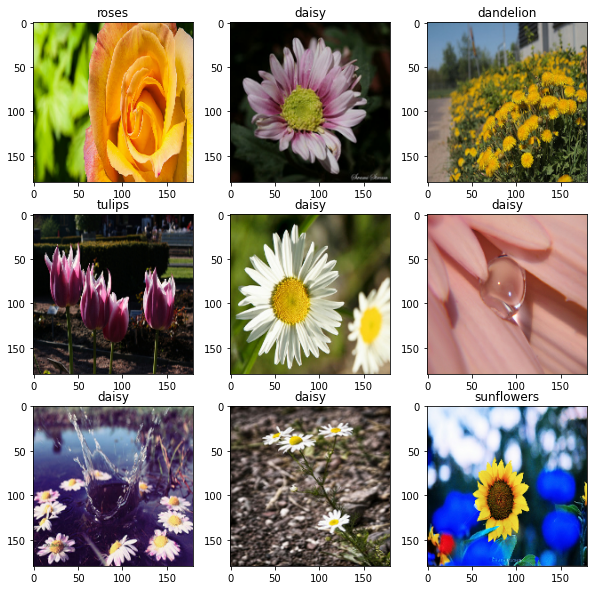

In [26]:
for images,labels in train_ds.take(1):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('int'))
    plt.title(train_ds.class_names[labels[i]])
  plt.show()

### 성능을 위한 설정

In [29]:
# 배치하고 캐시와 prefetch를 이용해서 빠르게 모델에 넣을수있음
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 모델에 학습시켜도 된다.

### 이미지 증강

In [52]:
data_augmen = keras.Sequential([
    layers.Rescaling(1./255.),
    layers.Resizing(180,180),
    layers.RandomFlip('horizontal'),
    layers.RandomFlip('vertical'),
    layers.RandomRotation(0.5)
])

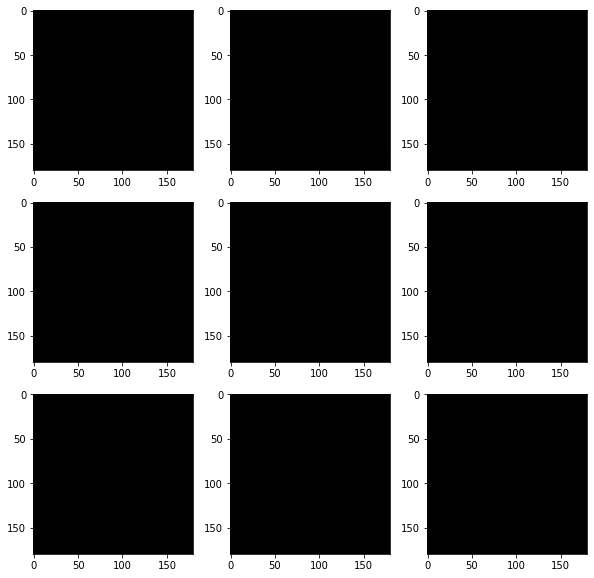

In [53]:
plt.figure(figsize =(10,10))
for images, labels in train_ds.take(1):
    augmented_images = data_augmen(images)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[i].numpy().astype('int'))

plt.show()

In [54]:
train_ds = train_ds.map(
    lambda img,label:(data_augmen(img),label),
    num_parallel_calls=tf.data.AUTOTUNE
)

val_ds = val_ds.map(
    lambda img,label:(data_augmen(img),label),
    num_parallel_calls=tf.data.AUTOTUNE
)

### 모델

In [55]:
def build_model_2():
    model = keras.Sequential([
        # padding 
        # default값은 valid
        # same은 이미지 크기가 변하지 않게 패딩을 준다.
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape = (180,180,3)),
        layers.MaxPool2D(2),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(2),

        layers.Flatten(),
        layers.Dropout(0.3),

        layers.Dense(256, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['acc']
    )
    return model

In [57]:
model = build_model_2()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 128)     

In [58]:
EPOCHS = 10

log = model.fit(train_ds,
                epochs=EPOCHS,
                validation_data=val_ds,
                verbose=1)

Epoch 1/10
92/92 [==============================] - 5s 50ms/step - loss: 1.3191 - acc: 0.4257 - val_loss: 1.1044 - val_acc: 0.5817
Epoch 2/10
92/92 [==============================] - 4s 43ms/step - loss: 1.0004 - acc: 0.5950 - val_loss: 0.9465 - val_acc: 0.6431
Epoch 3/10
92/92 [==============================] - 4s 43ms/step - loss: 0.8573 - acc: 0.6696 - val_loss: 0.9035 - val_acc: 0.6676
Epoch 4/10
92/92 [==============================] - 4s 43ms/step - loss: 0.7375 - acc: 0.7061 - val_loss: 0.9602 - val_acc: 0.6649
Epoch 5/10
92/92 [==============================] - 4s 43ms/step - loss: 0.6295 - acc: 0.7629 - val_loss: 0.9463 - val_acc: 0.6676
Epoch 6/10
92/92 [==============================] - 4s 43ms/step - loss: 0.5439 - acc: 0.7980 - val_loss: 1.0872 - val_acc: 0.6376
Epoch 7/10
92/92 [==============================] - 4s 43ms/step - loss: 0.5062 - acc: 0.8171 - val_loss: 1.1108 - val_acc: 0.6499
Epoch 8/10
92/92 [==============================] - 4s 43ms/step - loss: 0.3767 - a